使用设备: cuda
=== 8只科技股RSI计算分析 ===
正在下载数据...
原始数据形状: (667, 40)
数据列类型: ['Price', 'Ticker']
价格类型: ['Close', 'High', 'Low', 'Open', 'Volume']
股票代码: ['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NFLX', 'NVDA', 'TSLA']

收盘价数据:
数据期间: 2023-01-03 至 2025-08-29
交易日数: 667
股票数量: 8

=== 计算RSI指标 ===
正在计算 AAPL 的RSI...
正在计算 MSFT 的RSI...
正在计算 GOOGL 的RSI...
正在计算 AMZN 的RSI...
正在计算 NVDA 的RSI...
正在计算 TSLA 的RSI...
正在计算 META 的RSI...
正在计算 NFLX 的RSI...
RSI计算完成！

=== RSI数据分析 ===
最新RSI分析结果:
GOOGL | RSI:  74.2 | 价格: $ 212.72 | 超买 🔴
AAPL  | RSI:  66.0 | 价格: $ 232.14 | 强势 ⬆️
AMZN  | RSI:  54.3 | 价格: $ 229.00 | 强势 ⬆️
TSLA  | RSI:  51.3 | 价格: $ 333.87 | 强势 ⬆️
NFLX  | RSI:  48.2 | 价格: $1208.25 | 弱势 ⬇️
MSFT  | RSI:  46.6 | 价格: $ 506.69 | 弱势 ⬇️
META  | RSI:  46.4 | 价格: $ 738.70 | 弱势 ⬇️
NVDA  | RSI:  46.2 | 价格: $ 174.17 | 弱势 ⬇️

=== RSI统计特征 ===
RSI历史统计:
       平均RSI    标准差     最大值    最小值  超买次数(>70)  超卖次数(<30)  强势天数(>50)
AAPL   55.35  13.65  100.00  20.06         95         16        415
MSFT   55.60  12.40   81.74   0.00      

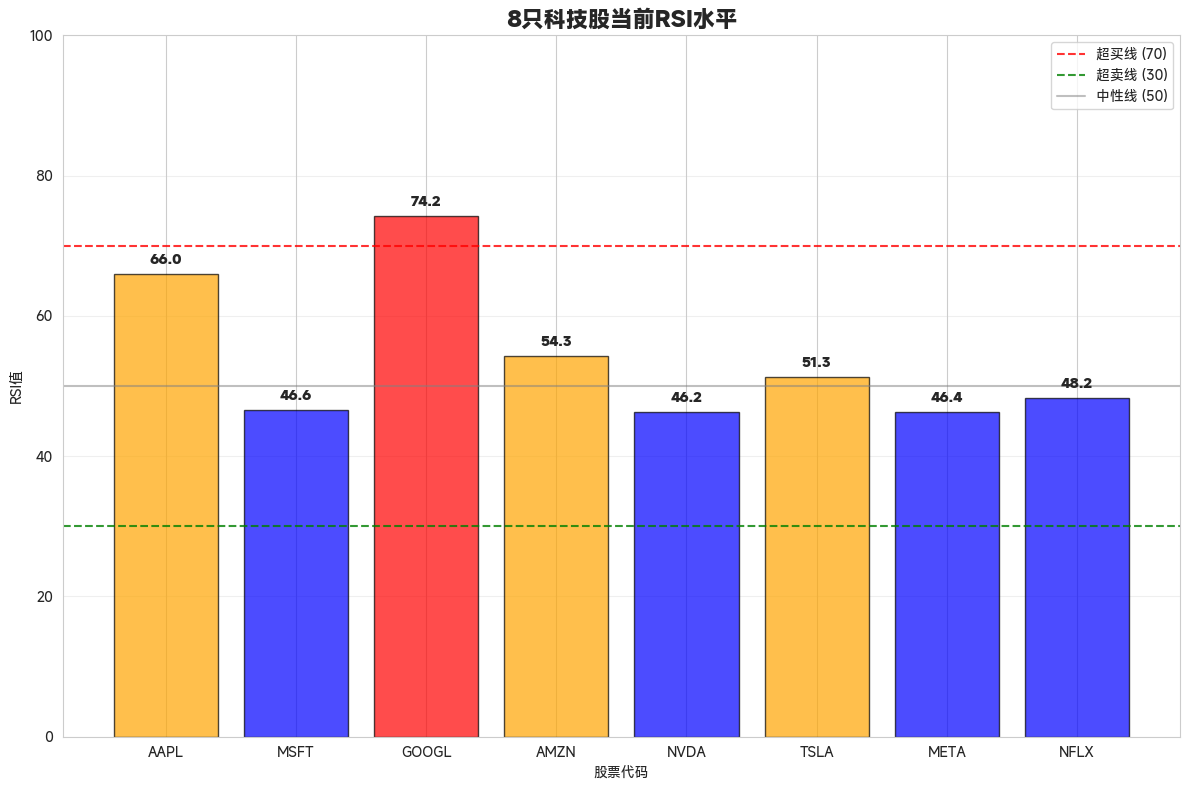

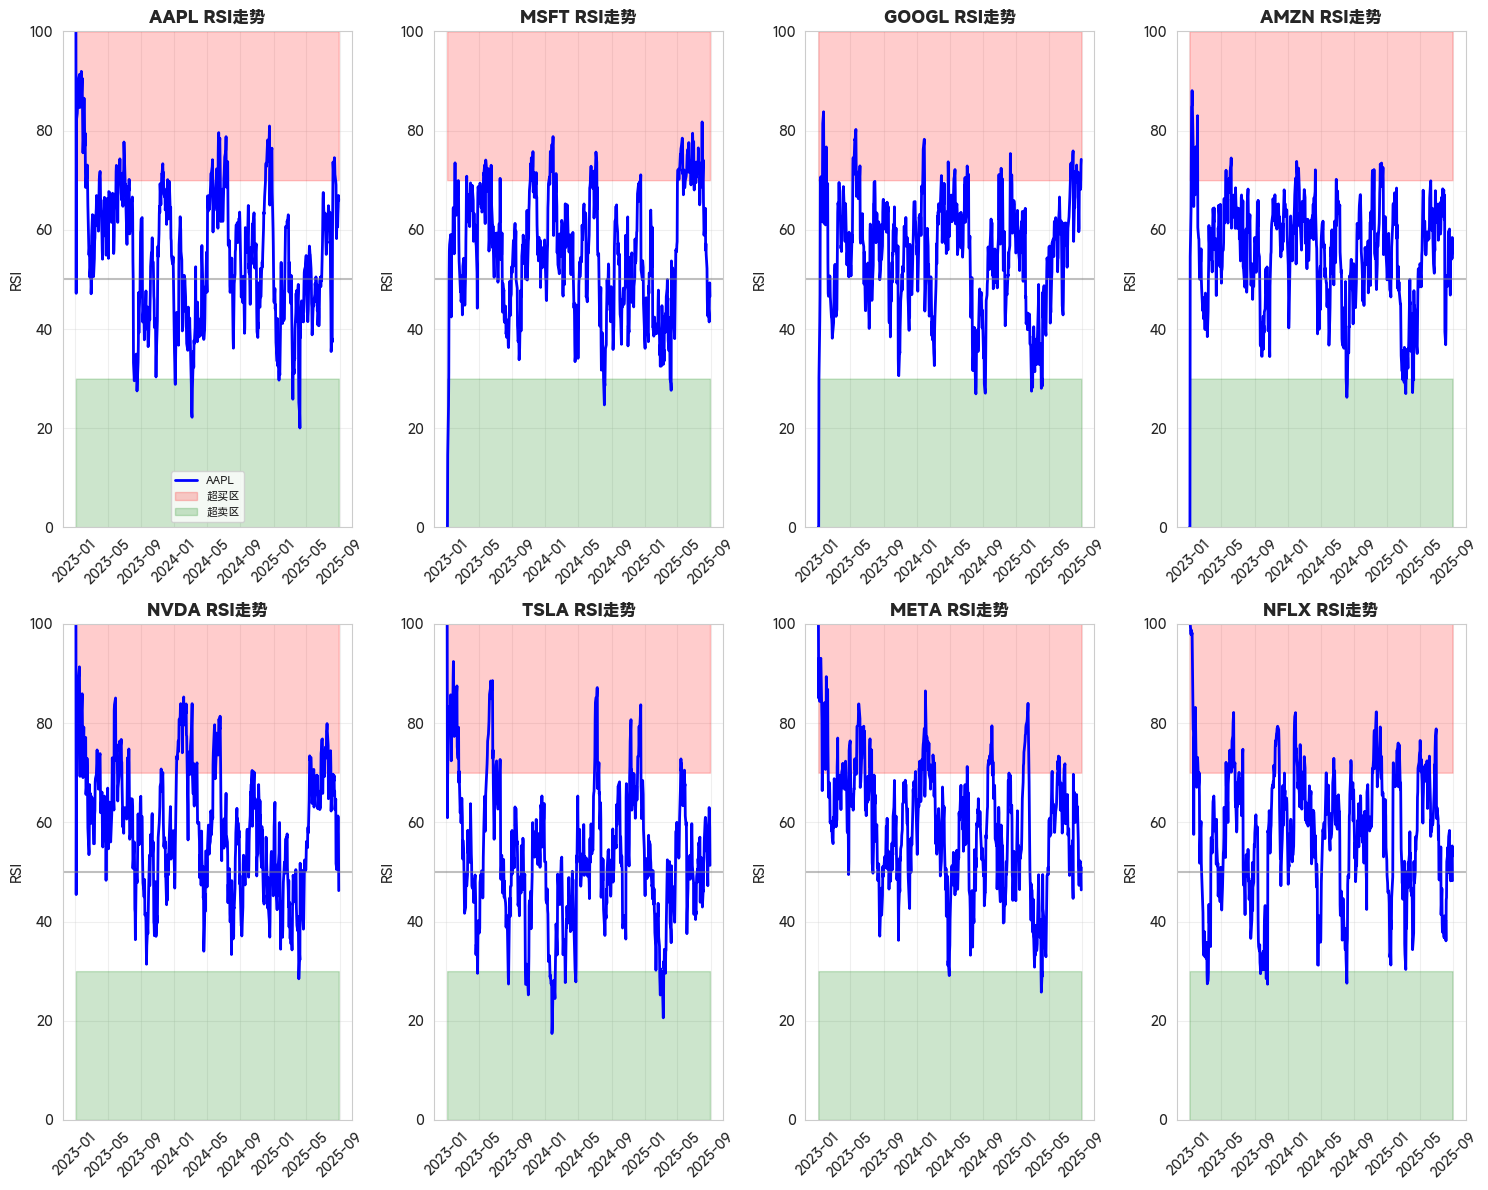


=== RSI交易信号回测 ===

分析 AAPL 的RSI交易策略:
  买入信号次数: 16
  卖出信号次数: 95
  买入持有收益: 88.23%
  RSI策略收益: -8.15%

分析 MSFT 的RSI交易策略:
  买入信号次数: 11
  卖出信号次数: 94
  买入持有收益: 116.14%
  RSI策略收益: 11.79%

分析 GOOGL 的RSI交易策略:
  买入信号次数: 13
  卖出信号次数: 55
  买入持有收益: 140.34%
  RSI策略收益: 40.60%

分析 AMZN 的RSI交易策略:
  买入信号次数: 11
  卖出信号次数: 34
  买入持有收益: 166.84%
  RSI策略收益: 28.58%

=== RSI热力图分析 ===


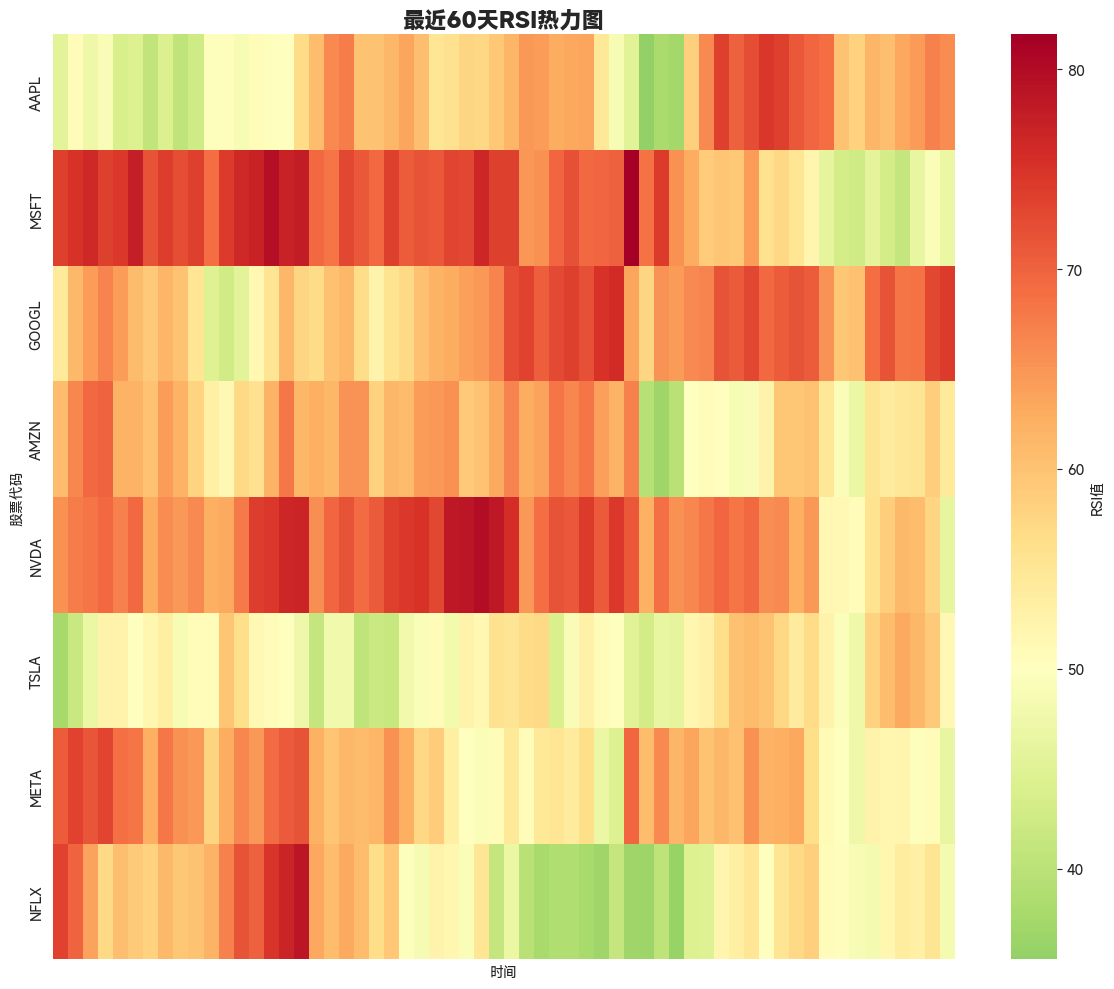


=== RSI分析总结报告 ===

📊 数据概况:
• 分析股票: AAPL, MSFT, GOOGL, AMZN, NVDA, TSLA, META, NFLX
• 数据期间: 2023-01-01 至 2025-08-30
• RSI计算周期: 14天
• 有效数据点: 666 个交易日

🎯 当前RSI状态:
• 超买股票 (RSI≥70): GOOGL
• 强势股票 (50<RSI<70): AAPL, AMZN, TSLA
• 弱势股票 (30<RSI≤50): MSFT, NVDA, META, NFLX

📈 交易建议:
• 考虑获利了结: GOOGL (RSI超买)

⚠️ 风险提示:
• RSI是滞后指标，需结合趋势和成交量分析
• 强趋势市场中RSI可能长期处于超买/超卖区域
• 建议与其他技术指标配合使用，不要单独依赖RSI

🔧 RSI使用技巧:
• 趋势市场: 上升趋势关注30-50买入，下降趋势关注50-70卖出
• 震荡市场: 严格按30买入、70卖出操作
• 背离信号: 价格与RSI背离往往预示转折点

RSI分析完成！建议定期更新数据以获取最新信号。


In [9]:
# %%
# 8只科技股RSI计算实战
# AAPL, MSFT, GOOGL, AMZN, NVDA, TSLA, META, NFLX

# 美股量化交易策略实现 - 完整版
# 使用真实美股数据，实现5种经典量化策略

# --- 环境设置 ---
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- 环境设置 ---
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['Misans']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"使用设备: {device}")

print("=== 8只科技股RSI计算分析 ===")

# %%
# --- 配置参数 ---
TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'NFLX']
START_DATE = '2023-01-01'
END_DATE = '2025-08-30'

# --- 数据获取和预处理 ---
print("正在下载数据...")
df_data = yf.download(TICKERS, start=START_DATE, end=END_DATE, progress=False)

print(f"原始数据形状: {df_data.shape}")
print(f"数据列类型: {df_data.columns.names}")
print(f"价格类型: {df_data.columns.levels[0].tolist()}")
print(f"股票代码: {df_data.columns.levels[1].tolist()}")

# 提取收盘价
df_prices = df_data['Close'].copy()
df_prices = df_prices.dropna()

print(f"\n收盘价数据:")
print(f"数据期间: {df_prices.index[0].date()} 至 {df_prices.index[-1].date()}")
print(f"交易日数: {len(df_prices)}")
print(f"股票数量: {len(df_prices.columns)}")

# %%
# === RSI计算函数 ===
def calculate_rsi(prices, period=14):
    """
    计算RSI相对强弱指标
    
    参数:
    prices: 价格序列 (pandas Series)
    period: 计算周期，默认14天
    
    返回:
    RSI值序列
    """
    
    # 计算价格变化
    delta = prices.diff()
    
    # 分离涨跌
    gain = delta.where(delta > 0, 0)  # 上涨时的收益，下跌时为0
    loss = -delta.where(delta < 0, 0)  # 下跌时的损失，上涨时为0
    
    # 计算平均涨跌幅（使用指数加权移动平均，更平滑）
    avg_gain = gain.ewm(alpha=1/period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, adjust=False).mean()
    
    # 计算相对强弱值RS
    rs = avg_gain / avg_loss
    
    # 计算RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# 批量计算所有股票的RSI
print("\n=== 计算RSI指标 ===")

df_rsi = pd.DataFrame(index=df_prices.index)

for ticker in TICKERS:
    print(f"正在计算 {ticker} 的RSI...")
    df_rsi[f'{ticker}_RSI'] = calculate_rsi(df_prices[ticker], period=14)

print("RSI计算完成！")

# %%
# === RSI数据分析 ===
print("\n=== RSI数据分析 ===")

# 获取最新RSI值
latest_rsi = {}
for ticker in TICKERS:
    latest_value = df_rsi[f'{ticker}_RSI'].dropna().iloc[-1]
    latest_rsi[ticker] = latest_value

# 转换为DataFrame便于分析
rsi_summary = pd.DataFrame({
    '当前RSI': latest_rsi,
    '当前价格': df_prices.iloc[-1]
})

# 添加RSI信号解读
def rsi_signal(rsi_value):
    if rsi_value >= 70:
        return '超买 🔴'
    elif rsi_value <= 30:
        return '超卖 🟢'
    elif rsi_value > 50:
        return '强势 ⬆️'
    else:
        return '弱势 ⬇️'

rsi_summary['RSI信号'] = rsi_summary['当前RSI'].apply(rsi_signal)
rsi_summary = rsi_summary.sort_values('当前RSI', ascending=False)

print("最新RSI分析结果:")
print("=" * 50)
for ticker in rsi_summary.index:
    rsi_val = rsi_summary.loc[ticker, '当前RSI']
    price = rsi_summary.loc[ticker, '当前价格']
    signal = rsi_summary.loc[ticker, 'RSI信号']
    print(f"{ticker:5s} | RSI: {rsi_val:5.1f} | 价格: ${price:7.2f} | {signal}")

# %%
# === RSI统计分析 ===
print(f"\n=== RSI统计特征 ===")

# 计算RSI统计信息
rsi_data_only = df_rsi.dropna()
rsi_stats = pd.DataFrame({
    '平均RSI': rsi_data_only.mean(),
    '标准差': rsi_data_only.std(),
    '最大值': rsi_data_only.max(),
    '最小值': rsi_data_only.min(),
    '超买次数(>70)': (rsi_data_only > 70).sum(),
    '超卖次数(<30)': (rsi_data_only < 30).sum(),
    '强势天数(>50)': (rsi_data_only > 50).sum()
})

# 重新排列列名，去掉_RSI后缀
rsi_stats.index = [col.replace('_RSI', '') for col in rsi_stats.index]

print("RSI历史统计:")
print(rsi_stats.round(2))

# 计算超买超卖比例
total_days = len(rsi_data_only)
print(f"\n交易行为分析 (总交易日: {total_days}):")
for ticker in TICKERS:
    col_name = f'{ticker}_RSI'
    overbought_pct = (rsi_data_only[col_name] > 70).sum() / total_days * 100
    oversold_pct = (rsi_data_only[col_name] < 30).sum() / total_days * 100
    strong_pct = (rsi_data_only[col_name] > 50).sum() / total_days * 100
    
    print(f"{ticker}: 超买{overbought_pct:.1f}% | 超卖{oversold_pct:.1f}% | 强势{strong_pct:.1f}%")

# %%
# === RSI可视化分析 ===
print(f"\n=== RSI可视化分析 ===")

# 1. 当前RSI柱状图
plt.figure(figsize=(12, 8))
current_rsi_values = [latest_rsi[ticker] for ticker in TICKERS]
colors = ['red' if x >= 70 else 'green' if x <= 30 else 'orange' if x > 50 else 'blue' 
          for x in current_rsi_values]

bars = plt.bar(TICKERS, current_rsi_values, color=colors, alpha=0.7, edgecolor='black')

# 添加RSI阈值线
plt.axhline(y=70, color='red', linestyle='--', alpha=0.8, label='超买线 (70)')
plt.axhline(y=30, color='green', linestyle='--', alpha=0.8, label='超卖线 (30)')
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.5, label='中性线 (50)')

# 在柱子上标注数值
for bar, value in zip(bars, current_rsi_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

plt.title('8只科技股当前RSI水平', fontsize=16, fontweight='bold')
plt.ylabel('RSI值')
plt.xlabel('股票代码')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# %%
# 2. RSI时间序列图
plt.figure(figsize=(15, 12))

for i, ticker in enumerate(TICKERS):
    plt.subplot(2, 4, i+1)
    
    # 绘制RSI曲线
    rsi_series = df_rsi[f'{ticker}_RSI'].dropna()
    plt.plot(rsi_series.index, rsi_series, linewidth=2, label=ticker, color='blue')
    
    # 添加超买超卖区域
    plt.fill_between(rsi_series.index, 70, 100, alpha=0.2, color='red', label='超买区')
    plt.fill_between(rsi_series.index, 0, 30, alpha=0.2, color='green', label='超卖区')
    plt.axhline(y=50, color='gray', linestyle='-', alpha=0.5)
    
    plt.title(f'{ticker} RSI走势', fontsize=12, fontweight='bold')
    plt.ylabel('RSI')
    plt.ylim(0, 100)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # 只在第一个图上显示图例
    if i == 0:
        plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

# %%
# === RSI交易信号分析 ===
print(f"\n=== RSI交易信号回测 ===")

def rsi_trading_signals(prices, rsi_values, buy_threshold=30, sell_threshold=70):
    """
    基于RSI生成交易信号
    """
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['rsi'] = rsi_values
    signals['position'] = 0
    
    # 生成交易信号
    signals.loc[rsi_values <= buy_threshold, 'position'] = 1  # 买入信号
    signals.loc[rsi_values >= sell_threshold, 'position'] = -1  # 卖出信号
    
    # 计算收益
    signals['market_return'] = prices.pct_change()
    signals['strategy_return'] = signals['position'].shift(1) * signals['market_return']
    
    return signals

# 为每只股票计算RSI策略收益
strategy_results = {}

for ticker in TICKERS[:4]:  # 先分析前4只股票
    print(f"\n分析 {ticker} 的RSI交易策略:")
    
    # 获取数据
    price_series = df_prices[ticker]
    rsi_series = df_rsi[f'{ticker}_RSI']
    
    # 计算交易信号
    signals = rsi_trading_signals(price_series, rsi_series)
    
    # 统计交易信号
    buy_signals = (signals['position'] == 1).sum()
    sell_signals = (signals['position'] == -1).sum()
    
    # 计算策略收益
    total_market_return = (price_series.iloc[-1] / price_series.iloc[0] - 1) * 100
    strategy_total_return = (1 + signals['strategy_return']).prod() - 1
    strategy_total_return_pct = strategy_total_return * 100
    
    print(f"  买入信号次数: {buy_signals}")
    print(f"  卖出信号次数: {sell_signals}")
    print(f"  买入持有收益: {total_market_return:.2f}%")
    print(f"  RSI策略收益: {strategy_total_return_pct:.2f}%")
    
    strategy_results[ticker] = {
        'buy_signals': buy_signals,
        'sell_signals': sell_signals,
        'market_return': total_market_return,
        'strategy_return': strategy_total_return_pct
    }

# %%
# === 多股票RSI比较热力图 ===
print(f"\n=== RSI热力图分析 ===")

# 准备最近60天的RSI数据用于热力图
recent_rsi = df_rsi.tail(60).copy()
recent_rsi.columns = [col.replace('_RSI', '') for col in recent_rsi.columns]

# 创建热力图
plt.figure(figsize=(12, 10))
sns.heatmap(recent_rsi.T, cmap='RdYlGn_r', center=50, 
            cbar_kws={'label': 'RSI值'}, 
            yticklabels=True, xticklabels=False)
plt.title('最近60天RSI热力图', fontsize=16, fontweight='bold')
plt.ylabel('股票代码')
plt.xlabel('时间')
plt.tight_layout()
plt.show()

# %%
# === RSI总结报告 ===
print("\n" + "="*60)
print("=== RSI分析总结报告 ===")
print("="*60)

print(f"\n📊 数据概况:")
print(f"• 分析股票: {', '.join(TICKERS)}")
print(f"• 数据期间: {START_DATE} 至 {END_DATE}")
print(f"• RSI计算周期: 14天")
print(f"• 有效数据点: {len(df_rsi.dropna())} 个交易日")

print(f"\n🎯 当前RSI状态:")
# 分类统计
overbought_stocks = [ticker for ticker, rsi in latest_rsi.items() if rsi >= 70]
oversold_stocks = [ticker for ticker, rsi in latest_rsi.items() if rsi <= 30]
strong_stocks = [ticker for ticker, rsi in latest_rsi.items() if 50 < rsi < 70]
weak_stocks = [ticker for ticker, rsi in latest_rsi.items() if 30 < rsi <= 50]

if overbought_stocks:
    print(f"• 超买股票 (RSI≥70): {', '.join(overbought_stocks)}")
if oversold_stocks:
    print(f"• 超卖股票 (RSI≤30): {', '.join(oversold_stocks)}")
if strong_stocks:
    print(f"• 强势股票 (50<RSI<70): {', '.join(strong_stocks)}")
if weak_stocks:
    print(f"• 弱势股票 (30<RSI≤50): {', '.join(weak_stocks)}")

print(f"\n📈 交易建议:")
if oversold_stocks:
    print(f"• 关注买入机会: {', '.join(oversold_stocks)} (RSI超卖)")
if overbought_stocks:
    print(f"• 考虑获利了结: {', '.join(overbought_stocks)} (RSI超买)")
if not oversold_stocks and not overbought_stocks:
    print("• 目前无明显RSI极端信号，建议观望")

print(f"\n⚠️ 风险提示:")
print("• RSI是滞后指标，需结合趋势和成交量分析")
print("• 强趋势市场中RSI可能长期处于超买/超卖区域")
print("• 建议与其他技术指标配合使用，不要单独依赖RSI")

print(f"\n🔧 RSI使用技巧:")
print("• 趋势市场: 上升趋势关注30-50买入，下降趋势关注50-70卖出")
print("• 震荡市场: 严格按30买入、70卖出操作")
print("• 背离信号: 价格与RSI背离往往预示转折点")

print("\n" + "="*60)
print("RSI分析完成！建议定期更新数据以获取最新信号。")
print("="*60)

In [10]:
weak_stocks

['MSFT', 'NVDA', 'META', 'NFLX']